# Linguistics 110: Closure and Voice-Onset Time

### Professor Susan Lin

This notebook will familiarize you with some of the basic strategies for data analysis that can be useful not only in this course, but possibly for the rest of your time at Cal. We will cover an overview of our computing environment, and then will explore the data on closure and VOT that you submit. 

If you want a more in-depth introduction to Python, click <a href='http://datahub.berkeley.edu/user-redirect/interact?account=ds-modules&repo=LINGUIS-110&branch=master&path=Intro'>here</a> to explore that notebook. You should be able to get through this entire notebook without that tutorial, it is there if you want to dive deeper into what is going on in the code.

## Table of Contents

1 - [Computing Environment](#computing environment)

2 - [Creating our Dataframe](#dataframe)

3 - [Exploring the Data](#exploring data)

4 - [Relationships between Closures](#closures)

5 - [Exploring Metadata](#metadata)

6 - [Comparing to Others](#to class)

## 1. Our Computing Environment, Jupyter notebooks  <a id='computing environment'></a>

This webpage is called a Jupyter notebook. A notebook is a place to write programs and view their results. 

### Text cells
In a notebook, each rectangle containing text or code is called a *cell*.

Text cells (like this one) can be edited by double-clicking on them. They're written in a simple format called [Markdown](http://daringfireball.net/projects/markdown/syntax) to add formatting and section headings.  You don't need to learn Markdown, but you might want to.

After you edit a text cell, click the "run cell" button at the top that looks like ▶| to confirm any changes. (Try not to delete the instructions of the lab.)

**Understanding Check 1** This paragraph is in its own text cell.  Try editing it so that this sentence is the last sentence in the paragraph, and then click the "run cell" ▶| button .  This sentence, for example, should be deleted.  So should this one.

A programming language is a vocabulary and set of grammatical rules for instructing a computer or computing device to perform specific tasks.

### Code cells
Other cells contain code in the Python 3 language. Just like natural human languages, it has rules -- Python is a programming language, which means that it is a set of grammatical rules and vocabulary for instructing a computer to perform tasks. It differs from natural language in two important ways:
1. The rules are *simple*.  You can learn most of them in a few weeks and gain reasonable proficiency with the language in a semester.
2. The rules are *rigid*.  If you're proficient in a natural language, you can understand a non-proficient speaker, glossing over small mistakes.  A computer running Python code is not smart enough to do that.

There's a lot of terminology in programming languages, but you don't need to know it all in order to program effectively. From time to time, you'll see a cryptic message, but you can often get by without deciphering it, by utilizing appropriate resources (sometimes it's as simple as a Google search).

Running a code cell will execute all of the code it contains. 

To run the code in a code cell, first click on that cell to activate it.  It'll be highlighted with a little green or blue rectangle.  Next, either press ▶| or hold down the `shift` key and press `return` or `enter`.

Try running this cell:

In [1]:
print("Hello, World!")

Hello, World!


The fundamental building block of Python code is an expression. Cells can contain multiple lines with multiple expressions. When you run a cell, the lines of code are executed in the order in which they appear. Every `print` expression prints a line. Run the next cell and notice the order of the output.

In [2]:
print("First this line is printed,")
print("and then this one.")

First this line is printed,
and then this one.


### Writing Jupyter notebooks
You can use Jupyter notebooks for your own projects or documents.  When you make your own notebook, you'll need to create your own cells for text and code.

To add a cell, click the + button in the menu bar.  It'll start out as a text cell.  You can change it to a code cell by clicking inside it so it's highlighted, clicking the drop-down box next to the restart (⟳) button in the menu bar, and choosing "Code".

### Other important things to know about the notebook
+ Click `File > Save and Checkpoint` to save the notebook.
+ This page runs on remote servers, meaning that when you run a cell, the code is sent somewhere else to be interpreted, then sends the results back to you to be displayed. So if you notice that it doesn't seem to be running anymore, try steps in this order:
    1. Click `Kernel > Interrupt`, then try running the cell again.
    2. Click `Kernel > Restart`, then run through all of the cells.
    3. Close and reopen DataHub.
+ Plots created in the notebook can be copied and pasted by right-clicking and selecting copy.
+ If you want to run all of the cells at once, click `Cell > Run All`.

Run the cell below so that we can get started on our module! These are our import statements (and a few other things). Because of the size of the Python community, if there is a function that you want to use, there is a good chance that someone has written one already and been kind enough to share their work in the form of packages. We can start using those packages by writing `import` and then the package name.

In [3]:
# imports -- just run this cell
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import mode
from ipywidgets import interact
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import colors
from sklearn.linear_model import LinearRegression
import warnings

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
%matplotlib inline

## 2. Creating our Dataframe <a id='dataframe'></a>
We will start by familiarizing ourselves with the data.

To visualize the data, we need to load the file first. In the line where we we assign `file_name` to equal the name of our dataset, which is a compilation of the results from the homework you completed last week.

Note that we have `data/` in front of the file name, which means that are file `example_data.csv` is in the `data` directory (folder).

In [4]:
file_name = 'data/fall17.csv'
data = pd.read_csv(file_name)
data.head()

,language,gender,height,pvot,tvot,kvot,bvot,dvot,gvot,pclo,tclo,kclo,bclo,dclo,gclo,class
0,Mandarin,Female,160.00,96,105,87,26,36,33,125,111,124,161,94,110,Fall 2017
1,English,Female,151.00,116,118,126,47,42,45,53,57,52,50,59,67,Fall 2017
2,Tagalog,Male,152.40,58,103,124,-40,-75,-35,113,92,94,88,75,61,Fall 2017
3,English,Female,154.94,100,94,90,21,35,37,110,88,72,126,83,84,Fall 2017
4,English,Female,154.94,115,128,123,-16,66,37,48,46,74,65,34,62,Fall 2017


### 2.1 Adding features from our data

We are going to add several columns to our dataframe. A column for each of the following:
+ The semester of this class (called `class`)
+ Average of all closure/vot for each individual (called `clo`/`vot`)
+ Average voiced closure/vot for each individual (called `vclo`/`vvot`)
+ Average voiceless closure/vot for each individual (called `vlclo`/`vlvot`)

First we will add the column for the average of all of the closures for each row. To do that, we'll first pull out just the columns that we want to take the average of.

In [5]:
subset = data[['pclo', 'tclo', 'kclo', 'bclo', 'dclo', 'gclo']]
subset.head()

,pclo,tclo,kclo,bclo,dclo,gclo
0,125,111,124,161,94,110
1,53,57,52,50,59,67
2,113,92,94,88,75,61
3,110,88,72,126,83,84
4,48,46,74,65,34,62


Then we will take the average across those rows.

In [6]:
clo_avg = subset.mean(axis=1)
clo_avg

0     120.833333
1      56.333333
2      87.166667
3      93.833333
4      54.833333
5      73.333333
6     118.166667
7     186.666667
8      65.666667
9     101.333333
10    130.333333
11    103.000000
12     88.333333
13     63.666667
14     65.000000
15     67.166667
16     62.333333
17     74.500000
18    129.166667
19    104.000000
20    107.000000
21     96.500000
22    112.166667
23     74.000000
24     83.333333
25    103.833333
26     76.666667
27     71.000000
28     97.833333
29     60.833333
         ...    
68     94.000000
69    190.333333
70    415.000000
71     84.166667
72    118.166667
73    120.333333
74    120.333333
75    141.666667
76     68.333333
77     61.666667
78     74.500000
79    107.666667
80     71.500000
81    130.000000
82    183.500000
83    139.166667
84     99.000000
85     50.333333
86     40.333333
87    138.333333
88     80.000000
89    232.500000
90    141.833333
91     67.666667
92     84.666667
93    109.833333
94     66.833333
95    108.1666

And finally, we will append those values to our dataframe as a column called `clo`.

In [7]:
data['clo'] = clo_avg
data.head()

,language,gender,height,pvot,tvot,kvot,bvot,dvot,gvot,pclo,tclo,kclo,bclo,dclo,gclo,class,clo
0,Mandarin,Female,160.00,96,105,87,26,36,33,125,111,124,161,94,110,Fall 2017,120.833333
1,English,Female,151.00,116,118,126,47,42,45,53,57,52,50,59,67,Fall 2017,56.333333
2,Tagalog,Male,152.40,58,103,124,-40,-75,-35,113,92,94,88,75,61,Fall 2017,87.166667
3,English,Female,154.94,100,94,90,21,35,37,110,88,72,126,83,84,Fall 2017,93.833333
4,English,Female,154.94,115,128,123,-16,66,37,48,46,74,65,34,62,Fall 2017,54.833333


We then repeat this process for all of the other columns that we want to create.

In [8]:
data['vot'] = data[['pvot', 'tvot', 'kvot', 'bvot', 'dvot', 'gvot']].mean(axis=1)
data['vclo'] = data[['bclo', 'dclo', 'gclo']].mean(axis=1)
data['vvot'] = data[['bvot', 'dvot', 'gvot']].mean(axis=1)
data['vlclo'] = data[['pclo', 'tclo', 'kclo']].mean(axis=1)
data['vlvot'] = data[['pvot', 'tvot', 'kvot']].mean(axis=1) 
data.head()

,language,gender,height,pvot,tvot,kvot,bvot,dvot,gvot,pclo,...,bclo,dclo,gclo,class,clo,vot,vclo,vvot,vlclo,vlvot
0,Mandarin,Female,160.00,96,105,87,26,36,33,125,...,161,94,110,Fall 2017,120.833333,63.833333,121.666667,31.666667,120.000000,96.000000
1,English,Female,151.00,116,118,126,47,42,45,53,...,50,59,67,Fall 2017,56.333333,82.333333,58.666667,44.666667,54.000000,120.000000
2,Tagalog,Male,152.40,58,103,124,-40,-75,-35,113,...,88,75,61,Fall 2017,87.166667,22.500000,74.666667,-50.000000,99.666667,95.000000
3,English,Female,154.94,100,94,90,21,35,37,110,...,126,83,84,Fall 2017,93.833333,62.833333,97.666667,31.000000,90.000000,94.666667
4,English,Female,154.94,115,128,123,-16,66,37,48,...,65,34,62,Fall 2017,54.833333,75.500000,53.666667,29.000000,56.000000,122.000000


# 3. Exploring the Data <a id='exploring data'></a>

### 3.1 Descriptive Statistics
Below we compute the some basic properties about the column `clo`.

In [9]:
closure_mode = mode(data['clo'])[0][0]
print('Mode: ', closure_mode)

data['clo'].describe()

Mode:  56.3333333333


count     98.000000
mean      97.214286
std       47.406923
min       37.333333
25%       71.583333
50%       88.500000
75%      107.500000
max      415.000000
Name: clo, dtype: float64

We can calculate all of the above statistics (except mode) for the entire table with one line.

In [10]:
data.describe()

,height,pvot,tvot,kvot,bvot,dvot,gvot,pclo,tclo,kclo,bclo,dclo,gclo,clo,vot,vclo,vvot,vlclo,vlvot
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,166.067092,87.275510,95.285714,98.061224,-10.775510,-5.948980,4.795918,112.081633,92.244898,87.816327,105.163265,94.000000,91.979592,97.214286,44.782313,97.047619,-3.976190,97.380952,93.540816
std,7.936344,29.187549,36.470296,44.210326,60.767519,55.040823,56.009749,91.463550,59.941047,47.764531,46.772027,46.775621,44.957249,47.406923,26.995316,41.658350,50.725306,60.792042,30.320794
min,151.000000,24.000000,-145.000000,-118.000000,-208.000000,-161.000000,-163.000000,29.000000,23.000000,13.000000,14.000000,22.000000,15.000000,37.333333,-21.666667,28.333333,-162.333333,27.333333,-68.000000
25%,160.000000,64.250000,83.000000,79.250000,-19.000000,-24.500000,-30.500000,78.000000,60.250000,69.250000,68.250000,66.500000,63.500000,71.583333,25.708333,69.500000,-23.583333,69.000000,79.833333
50%,165.000000,83.000000,100.500000,105.000000,11.000000,15.500000,25.000000,94.500000,80.000000,81.000000,100.000000,86.500000,84.000000,88.500000,50.500000,88.833333,16.333333,87.000000,95.500000
75%,170.180000,102.000000,112.250000,121.250000,20.000000,26.000000,37.000000,115.000000,100.750000,97.750000,126.000000,112.000000,110.000000,107.500000,62.625000,118.083333,25.250000,108.000000,112.666667
max,186.000000,177.000000,193.000000,210.000000,161.000000,96.000000,141.000000,731.000000,484.000000,453.000000,292.000000,271.000000,259.000000,415.000000,114.666667,274.000000,77.000000,556.000000,157.333333


### 3.2 Data Visualization
Now that we have our data in order, let's get a picture of the data with some plots.

Let's start by visualizing the distribution of `vot` with a histogram.

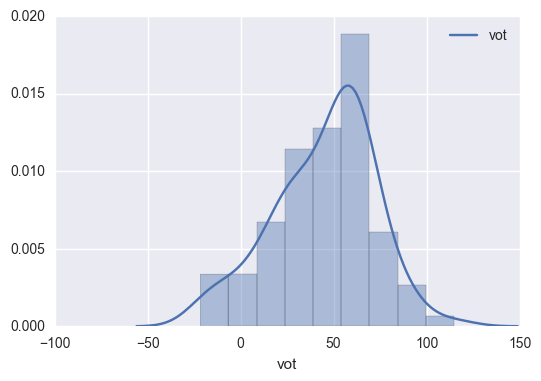

In [11]:
sns.distplot(data['vot'], kde_kws={"label": "vot"})

Next, we'll compare the distributions of the voiced and voiceless voice-onset times.

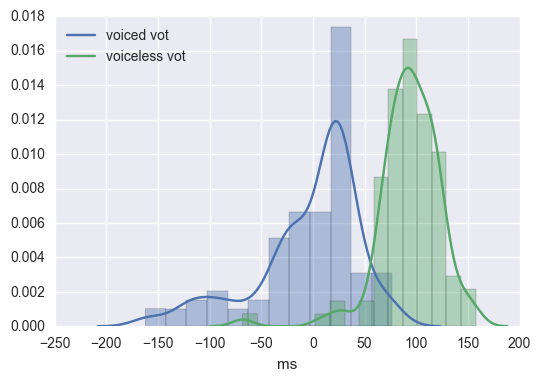

In [12]:
sns.distplot(data['vvot'], kde_kws={"label": "voiced vot"})
sns.distplot(data['vlvot'], kde_kws={"label": "voiceless vot"})
plt.xlabel('ms')

The distributions of the three voiceless stops are below.

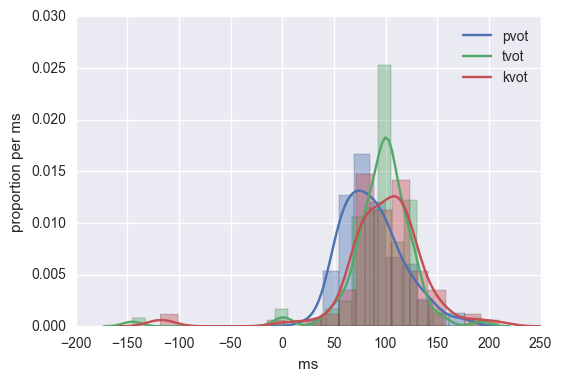

In [13]:
sns.distplot(data['pvot'], kde_kws={"label": "pvot"})
sns.distplot(data['tvot'], kde_kws={"label": "tvot"})
sns.distplot(data['kvot'], kde_kws={"label": "kvot"})

plt.xlabel('ms')
plt.ylabel('proportion per ms')

The distributions of the three voiced stops are below.

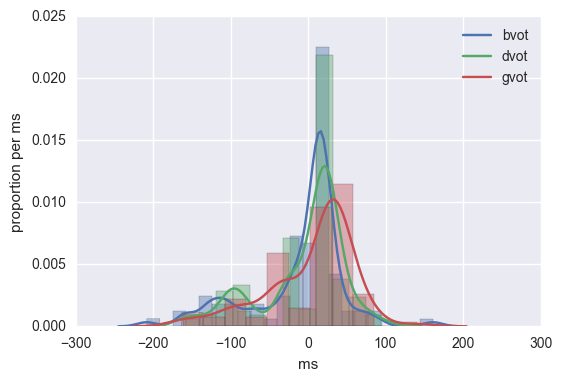

In [14]:
sns.distplot(data['bvot'], kde_kws={"label": "bvot"})
sns.distplot(data['dvot'], kde_kws={"label": "dvot"})
sns.distplot(data['gvot'], kde_kws={"label": "gvot"})

plt.xlabel('ms')
plt.ylabel('proportion per ms')

Below, we see the native languages represented in the data.

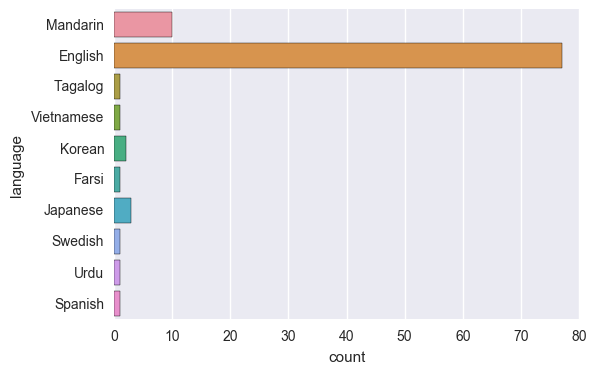

In [15]:
sns.countplot(y="language", data=data)

Below, we have a the distribution of height.

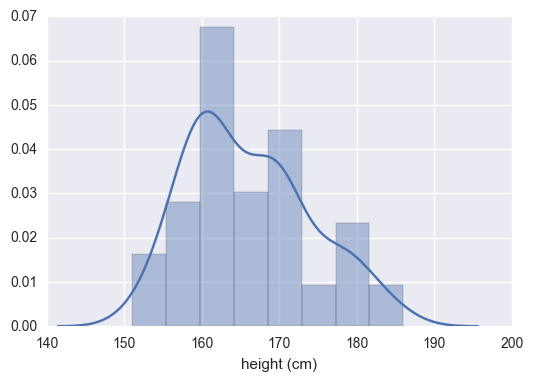

In [16]:
sns.distplot(data['height'])

plt.xlabel('height (cm)')

# 4. Relationships between closures <a id='closures'></a>

Now will will shift back away from single column visualizations, and start to compare values between columns, looking specifically at the different closures in our dataframe. Run the cell below that will automate some of plotting for us.

In [17]:
def plot_with_equality_line(xs, ys, best_fit=False):
    fig, ax = plt.subplots()
    sns.regplot(xs, ys, fit_reg=best_fit, ax=ax)

    lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
    ax.plot(lims, lims, '--', alpha=0.75, zorder=0, c='black')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    
    print('Points above line: ' + str(sum(xs < ys)))
    print('Points below line: ' + str(sum(xs > ys)))
    print('Points on line: ' + str(sum(xs == ys)))

### 4.1 Using a line where x = y

We'll start by making scatter plots. They takes the values (from identified columns) of individual rows, and plots them as a dot on our coordinate plane. So in the plot below, each point will represent a person's `tclo` and `pclo`. We are going to plot a dashed line that marks where the x-values are equal to the y-values, which helps us see which value is bigger for an individual. If a point is above the line, their y-value is larger than their x. If a point is below, their x-value is greater than their y. 

#### 4.1.1 Voiceless

Points above line: 71
Points below line: 25
Points on line: 2


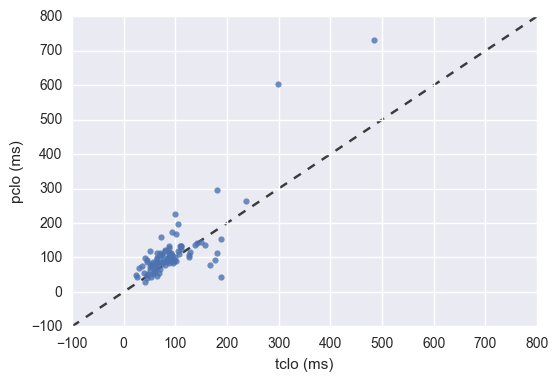

In [18]:
plot_with_equality_line(data['tclo'], data['pclo'])

plt.xlabel('tclo (ms)')
plt.ylabel('pclo (ms)')

Points above line: 72
Points below line: 22
Points on line: 4


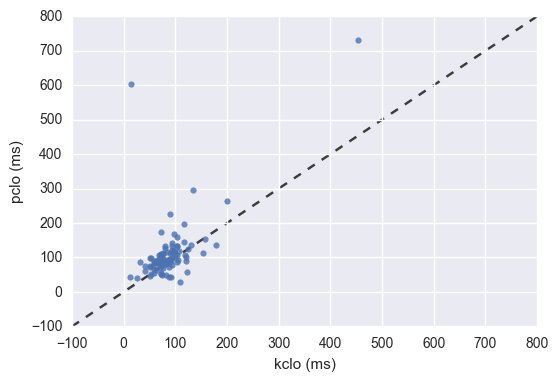

In [19]:
plot_with_equality_line(data['kclo'], data['pclo'])

plt.xlabel('kclo (ms)')
plt.ylabel('pclo (ms)')

Points above line: 56
Points below line: 42
Points on line: 0


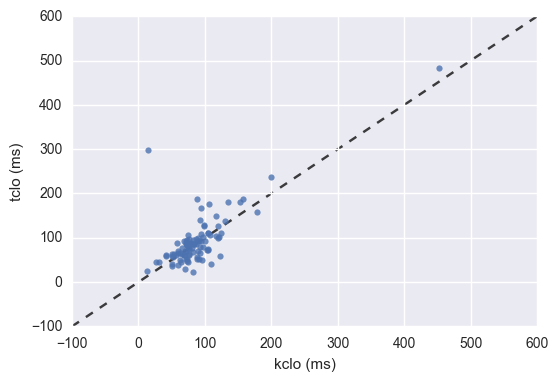

In [20]:
plot_with_equality_line(data['kclo'], data['tclo'])

plt.xlabel('kclo (ms)')
plt.ylabel('tclo (ms)')

#### 4.1.2 Voiced

Points above line: 68
Points below line: 30
Points on line: 0


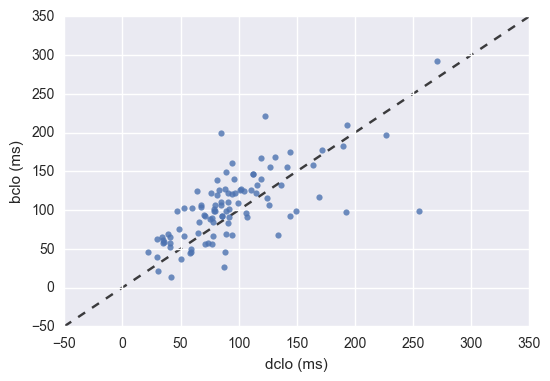

In [21]:
plot_with_equality_line(data['dclo'], data['bclo'])

plt.xlabel('dclo (ms)')
plt.ylabel('bclo (ms)')

Points above line: 69
Points below line: 29
Points on line: 0


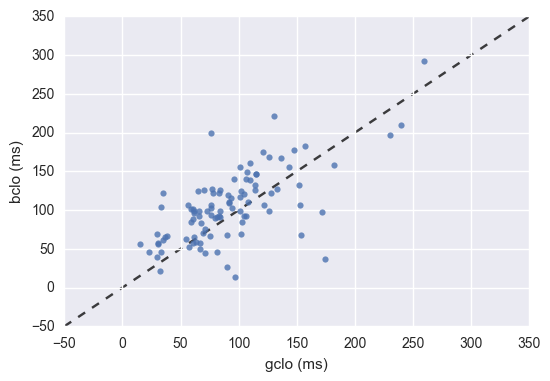

In [22]:
plot_with_equality_line(data['gclo'], data['bclo'])

plt.xlabel('gclo (ms)')
plt.ylabel('bclo (ms)')

Points above line: 49
Points below line: 46
Points on line: 3


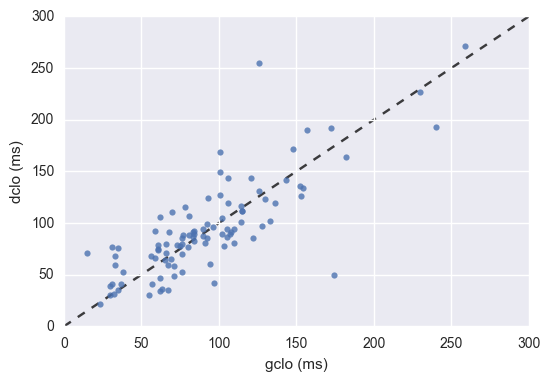

In [23]:
plot_with_equality_line(data['gclo'], data['dclo'])

plt.ylabel('dclo (ms)')
plt.xlabel('gclo (ms)')

### 4.2 Using box-and-whisker plots

Those scatter plots are informative, but sometimes it's difficult to make conclustions from them, especially in our case where we have so much raw data. To make easier comparisons about the ranges of values that our closures we can use boxplots.

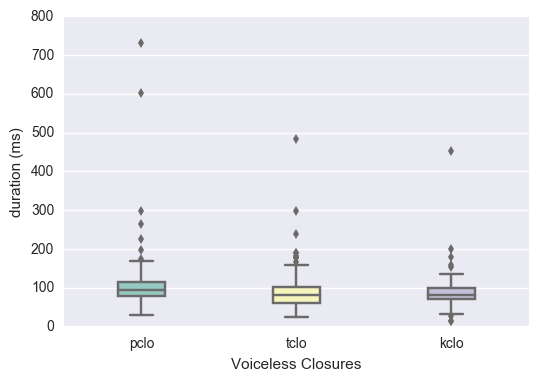

In [24]:
sns.boxplot(data=data[['pclo', 'tclo', 'kclo']], width=.3, palette="Set3")

plt.ylabel('duration (ms)')
plt.xlabel('Voiceless Closures')

With the above plot, it can be different to compare values of the box-and-whisker plots because the outliers require us to zoom out. Below, we will zoom in to the boxes.

(0, 212)

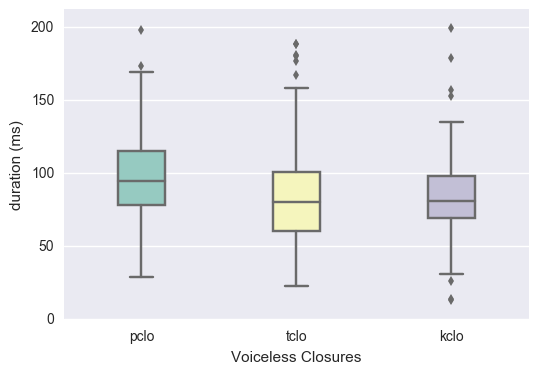

In [25]:
sns.boxplot(data=data[['pclo', 'tclo', 'kclo']], width=.3, palette="Set3")

plt.ylabel('duration (ms)')
plt.xlabel('Voiceless Closures')
plt.ylim(0, 212)

We then recreate those graphs, but using our voiced closures.

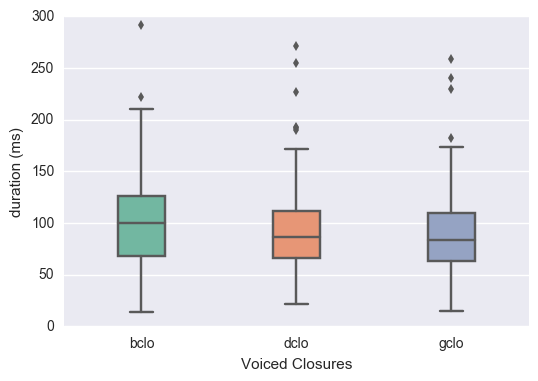

In [26]:
sns.boxplot(data=data[['bclo', 'dclo', 'gclo']], width=.3, palette="Set2")

plt.ylabel('duration (ms)')
plt.xlabel('Voiced Closures')

(0, 212)

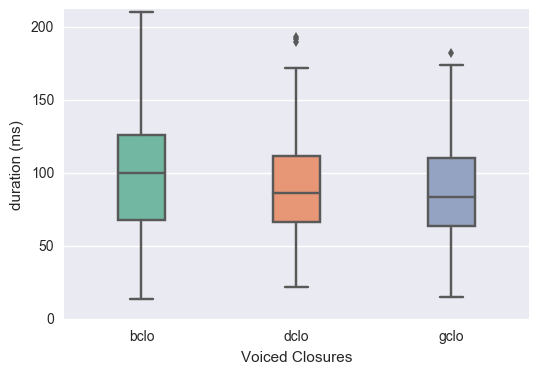

In [27]:
sns.boxplot(data=data[['bclo', 'dclo', 'gclo']], width=.3, palette="Set2")

plt.ylabel('duration (ms)')
plt.xlabel('Voiced Closures')
plt.ylim(0, 212)

Do our box-whisker plots corroborate the scatter plot data? Are we able to come to the same conclusions that we were before?

# 5. Explore relationships to metadata <a id='metadata'></a>
Now let's explore relationships between closure and different characteristics of the persons who delivered those stats, looking at language and height. We'll draw scatter plots to see whether there are linear relationships between them.

### 5.1 Language
Before we look at the actual relationship, it is important to realize any potential limitations of our observations. If you look back up to the bar plot of different native languages, you will see that the majority speak English as their native language.

Question: if we try to come up with conclusion about people who speak Tagalog or Farsi as their first language, would the conclusions be reliable and why?

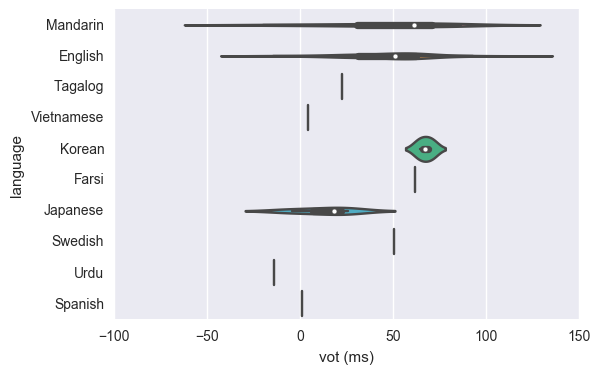

In [28]:
sns.violinplot(x="vot", y="language", data=data)

plt.xlabel('vot (ms)')

Compare the distributions. Can you make any meaningful observations?

### 5.2 Height

Now we'll look at how height influences closure, but first we are going to trim out one of the outliers.

In [29]:
trimmed = data[data['clo'] < 250]

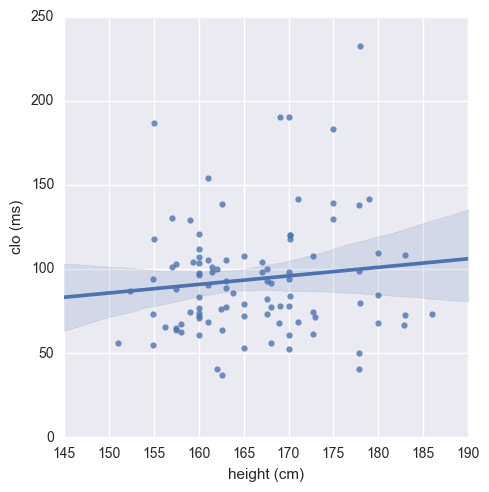

In [30]:
sns.lmplot('height', 'clo', data=trimmed, fit_reg=True)

plt.xlabel('height (cm)')
plt.ylabel('clo (ms)')

In the scatter plot above, each dot represents the average closure and height of an individual. 

Change "fit_reg" to "True" in the code above to see the regression line.

What does this graph tell about the relationship between height and closure? Regression lines describe a general trend of the data, sometimes referred to as the 'line of best fit'.

Let's see if there's a different kind of relationship between height and voiced/voiceless.

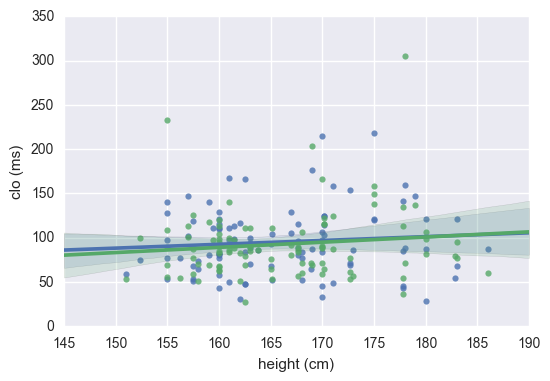

In [31]:
sns.regplot('height', 'vclo', data=trimmed, fit_reg=True)
sns.regplot('height', 'vlclo', data=trimmed, fit_reg=True)

plt.xlabel('height (cm)')
plt.ylabel('clo (ms)')

### 5.3 Visualizing Multiple Features

So far, we've been presenting two kinds of information in one plot (e.g. language vs. closure). Would presenting more than two at once help us at analyzing? Let's try it.

Below, the color of the dots will depend on the language that person speaks rather than its gender.

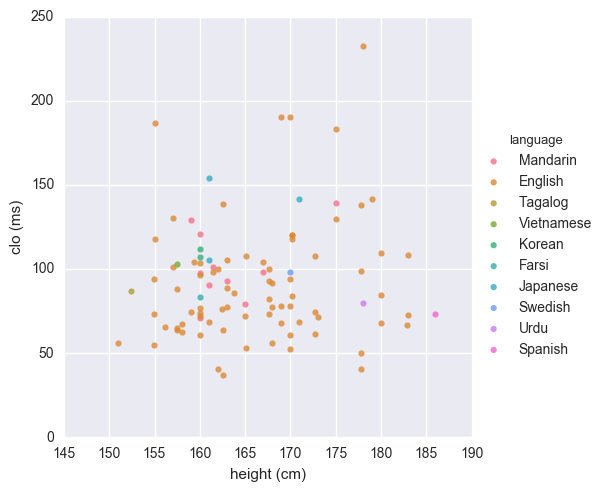

In [32]:
sns.lmplot('height', 'clo',data=trimmed, fit_reg=False, hue="language")

plt.xlabel('height (cm)')
plt.ylabel('clo (ms)')

What conclusions can you make from the graph above, if any? Is it easy to analyze this plot? Why?

The lesson here is that sometimes less is more.

# 6. Compare our data with data from last semester <a id='to class'></a>

It's often useful to compare current data with past data. Below, we'll explore class data collected from Fall 2015.

In [33]:
old_file_name = 'data/fall15.csv'
fa15 = pd.read_csv(old_file_name)

fa15.head()

,language,height,clo,vot,pclo,tclo,kclo,pvot,tvot,kvot,class
0,English,162.50,22.966667,88.827667,22.0,20.7,26.2,86.985,87.8774,91.6206,Fall 2015
1,English,177.00,50.666667,54.666667,81.0,32.0,39.0,72.000,49.0000,43.0000,Fall 2015
2,English,170.18,70.000000,166.666667,70.0,70.0,70.0,150.000,230.0000,120.0000,Fall 2015
3,English,178.00,39.666667,145.666667,34.0,56.0,29.0,170.000,190.0000,77.0000,Fall 2015
4,English,177.80,100.333333,154.000000,144.0,94.0,63.0,132.000,153.0000,177.0000,Fall 2015


The data from the previous semester does not have all of the same features (columns) that this semester's data has. So in order to make easy comparisons, we will just select out the columns that are in both dataframes.

In [34]:
current_subset = data[fa15.columns]
current_subset.head()

,language,height,clo,vot,pclo,tclo,kclo,pvot,tvot,kvot,class
0,Mandarin,160.00,120.833333,63.833333,125,111,124,96,105,87,Fall 2017
1,English,151.00,56.333333,82.333333,53,57,52,116,118,126,Fall 2017
2,Tagalog,152.40,87.166667,22.500000,113,92,94,58,103,124,Fall 2017
3,English,154.94,93.833333,62.833333,110,88,72,100,94,90,Fall 2017
4,English,154.94,54.833333,75.500000,48,46,74,115,128,123,Fall 2017


Let's look at the difference between the major statistics of the previous data and this semester's.

In [35]:
difference = fa15.describe() - current_subset.describe()
difference

,height,clo,vot,pclo,tclo,kclo,pvot,tvot,kvot
count,-11.000000,-11.000000,-11.000000,-11.000000,-11.000000,-11.000000,-11.000000,-11.000000,-11.000000
mean,2.024517,-12.935118,44.630660,-20.944909,-9.147603,-9.212844,-5.658372,-4.129767,-2.595390
std,1.972810,-9.802264,4.822212,-47.628739,-20.572634,-10.343885,-0.426708,-2.334979,25.545172
min,-19.000000,-29.973766,40.666667,-21.047000,-16.062300,-5.812000,-7.351000,152.000000,127.497000
25%,2.000000,-12.192667,46.958334,-9.500000,-4.250000,-18.161000,-4.375000,-10.005500,-4.750000
50%,2.640000,-10.327667,35.833333,-10.500000,-5.000000,-8.000000,-2.000000,-7.737000,-16.479000
75%,5.950000,-1.158167,38.847500,7.672500,11.579000,3.217500,-2.155000,-7.060500,-16.000000
max,-0.580000,-214.000000,147.230333,-486.000000,-304.830000,-249.000000,-7.000000,37.000000,462.280000


It's a little unintuitive to tell how large of differences those are, so let's look at the relative difference to this semester's data.

In [36]:
relative_difference = difference / current_subset.describe()
relative_difference

,height,clo,vot,pclo,tclo,kclo,pvot,tvot,kvot
count,-0.112245,-0.112245,-0.112245,-0.112245,-0.112245,-0.112245,-0.112245,-0.112245,-0.112245
mean,0.012191,-0.133058,0.996614,-0.186872,-0.099166,-0.104910,-0.064833,-0.043341,-0.026467
std,0.248579,-0.206769,0.178631,-0.520740,-0.343214,-0.216560,-0.014620,-0.064024,0.577810
min,-0.125828,-0.802869,-1.876923,-0.725759,-0.698361,-0.447077,-0.306292,-1.048276,-1.080483
25%,0.012500,-0.170328,1.826580,-0.121795,-0.070539,-0.262253,-0.068093,-0.120548,-0.059937
50%,0.016000,-0.116697,0.709571,-0.111111,-0.062500,-0.098765,-0.024096,-0.076985,-0.156943
75%,0.034963,-0.010774,0.620319,0.066717,0.114928,0.032916,-0.021127,-0.062900,-0.131959
max,-0.003118,-0.515663,1.283985,-0.664843,-0.629814,-0.549669,-0.039548,0.191710,2.201333


Now, let's add some color to help spot the largest relative changes. Run the next two cells.

In [37]:
scale = pd.DataFrame({'scale': np.arange(-3,5,1)*.2}).set_index(relative_difference.index)

def background_gradient(s, df, m=None, M=None, cmap='RdBu_r', low=0, high=0):
    # code modified from: https://stackoverflow.com/questions/38931566/pandas-style-background-gradient-both-rows-and-colums
    if m is None:
        m  = df.min().min()
    if M is None:
        M = df.max().max()
    rng = M - m
    
    norm = colors.Normalize(m - (rng * low), M + (rng * high))
    normed = norm(s.values)
    c = [colors.rgb2hex(x) for x in ListedColormap(sns.color_palette(cmap,8))(normed)]
    return ['background-color: %s' % color for color in c]

In [38]:
relative_difference.merge(scale, left_index=True, right_index=True).style.apply(background_gradient,
               df=relative_difference, m=-1, M=1)

Now that we can see where the largest relative differences between this semester's and the prior semester's data are, let's take a look at them with further visualization. We'll start with `vot` because the column has quite a few rows with dark colors.

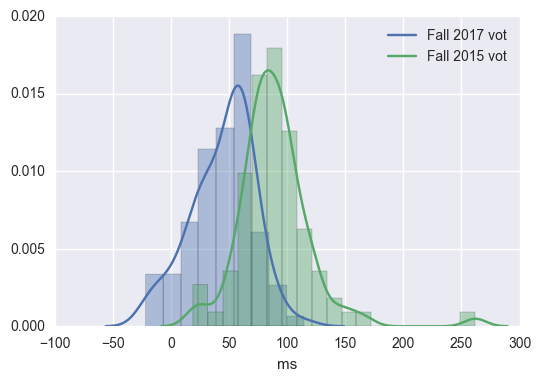

In [39]:
sns.distplot(data['vot'], kde_kws={"label": "Fall 2017 vot"})
sns.distplot(fa15['vot'], kde_kws={"label": "Fall 2015 vot"})

plt.xlabel('ms')

Why is this? The graph below should offer some insight.

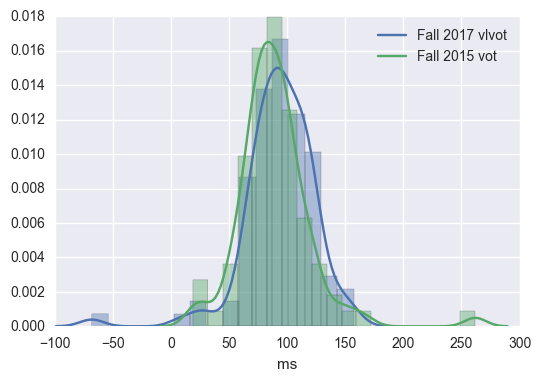

In [40]:
sns.distplot(data['vlvot'], kde_kws={"label": "Fall 2017 vlvot"}) # notice the call to voiced vot
sns.distplot(fa15['vot'], kde_kws={"label": "Fall 2015 vot"})

plt.xlabel('ms')

There are some large differences for `kvot`, so let's take a look at those distributions.

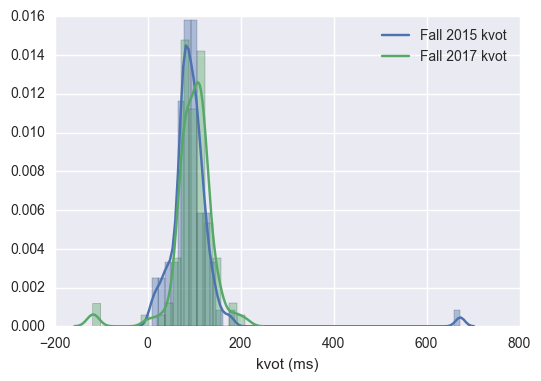

In [41]:
sns.distplot(fa15['kvot'], kde_kws={"label": "Fall 2015 kvot"})
sns.distplot(data['kvot'], kde_kws={"label": "Fall 2017 kvot"})

plt.xlabel('kvot (ms)')

Those differences mainly come from the presence of outliers. A particularly large value for Fall 2015 and a particularly small value for Fall 2017. Fell free to copy and paste some of the code from above and explore more of the relationships between the older data and this semester's data. Remember that to insert a cell below, you can either press `esc + b` or you can click `Insert > Insert Cell Below` on the toolbar.